ELEC-E8105 

Non-linear filtering and parameter estimation Spring 2019

Erkka Tahvanainen

K80343

Exercise round 7

# Exercise 1. (Rao-Blackwellization)

Let $x_k, k = 1,...,K$ be independent draws from $N(m,P)$ with unknown $m$
and known $P$. A crude estimator for $m$ is given by

$$ \hat{m} (x_{1:K}) = x_1$$

and sufficient statistic for $m$ is given by

$$s(x_{1:K}) = \sum_{k=1}^{K} x_k$$

Do the following steps:

**(a)** The vector $\begin{bmatrix} 
 \hat{m}(x_{1:K}) \\
 s(x_{1:K}) \end{bmatrix}$
 
has a Gaussian distribution. Compute the mean vector and the covariance
matrix.

$\begin{bmatrix} 
 \hat{m}(x_{1:K}) \\
 s(x_{1:K}) \end{bmatrix} \sim N(\begin{bmatrix} 
 m \\
Km \end{bmatrix}, \begin{bmatrix} 
 P & P \\
 P & KP \end{bmatrix})$
 

$E[ \begin{bmatrix} 
 \hat{m}(x_{1:K}) \\
 s(x_{1:K}) \end{bmatrix}] =  \begin{bmatrix} 
 E[\hat{m}(x_{1:K})] \\
 E[s(x_{1:K})] \end{bmatrix} =  \begin{bmatrix} 
 E[x_{1}] \\
 E[ \sum_{k=1}^{K} x_k] \end{bmatrix} =  \begin{bmatrix} 
 m \\
Km \end{bmatrix}$

$cov (\hat{m} (x_{1:K}),s(x_{1:K})) = E[(x_1 -m)(\sum_{k=1}^{K} x_k - Km)^T]$

$= E[x_1(\sum_{k=1}^{K} x_k^T - Km^T)-m(\sum_{k=1}^{K} x_k^T - Km^T)]$

$= E[x_1 x_1^T + x_1\sum_{k=2}^{K} x_k^T - K x_1 m^T-m \sum_{k=1}^{K} x_k^T - Kmm^T)]$
$= E[x_1 x_1^T] + E[x_1\sum_{k=2}^{K} x_k^T] - E[K x_1 m^T]-E[m \sum_{k=1}^{K} x_k^T] - E[Kmm^T)]$


$= P - mm^T + E[x_1]E[\sum_{k=2}^{K} x_k^T] - KE[x_1]m^T-m E[\sum_{k=1}^{K} x_k^T] - Kmm^T$

$= P - mm^T+ (K-1)mm^T - Kmm^T-Kmm^T -Kmm^T = P - (2+2K)mm^T$

$ \begin{bmatrix} 
 cov(\hat{m} (x_{1:K}),\hat{m} (x_{1:K})) & cov (\hat{m} (x_{1:K}),s(x_{1:K})) \\
 cov (s(x_{1:K}),\hat{m} (x_{1:K}))) & cov(s(x_{1:K}),s(x_{1:K})) \end{bmatrix} = \begin{bmatrix} 
 P & P - (2+2K)mm^T \\
 P^T - (2+2K)m^Tm & KP \end{bmatrix}$

**(b)** Compute the conditional mean
$$E[\hat{m}(x_{1:K})| s(x_{1:K})]$$

$E[\hat{m}(x_{1:K})| s(x_{1:K})] = m +  (P - (2+2K)mm^T)(KP)^{-1}(\sum_{k=1}^{K} x_k - Km)$

$=m +  \frac{1}{K}(P - (2+2K)mm^T)P^{-1}(\sum_{k=1}^{K} x_k - Km)$

$ = m +  \frac{1}{K}(PP^{-1} - (2+2K)mm^TP^{-1})(\sum_{k=1}^{K} x_k - Km)$

$ = m +  \frac{1}{K}(I - (2+2K)mm^TP^{-1})(\sum_{k=1}^{K} x_k - Km)$

**(c)** Compare the variance of $\hat{m}(x_{1:K})$ with the variance of $E[\hat{m}(x_{1:K})|s(x_{1:K})]$, which estimator is better?

$\Sigma = P - (P - (2+2K)mm^T)(KP)^{-1}(P^T - (2+2K)m^Tm )$

$E[E[\hat{m}(x_{1:K})| s(x_{1:K})] - m]^2 = E[E[\hat{m}(x_{1:K})-m| s(x_{1:K})]]^2 \le E[E[(\hat{m}(x_{1:K})-m)^2| s(x_{1:K})]] = E[(\hat{m}(x_{1:K})-m)^2]$ 

Sufficient statistic estimator is better

# Exercise 2. (Rao-Blackwellized Particle Filter I)

Consider the following clutter model:

$x_k | x_{k-1} \sim N(x_{k-1},1)$

$u_k \sim Bernoulli(0.1)$

$y_k | x_k, u_k \sim (1 - u_k)N(x_k, 1) + u_k N(0, 10)$

where $u_k \sim Bernoulli(p)$ means that $u_k$ equals 1 with probability p and 0
with probability 1 - p, respectively.

**(a)** Write down the Rao-Blackwellized particle filter equations for this
model.

Now we have (Transition densities)

$p(x_k|x_{k-1},u_{k-1}) = N(x_k | A_{k-1}(u_{k-1})x_{k-1}, Q_{k-1}(u_{k-1})) = N(x_k | x_{k-1}, 1)$

Which means that $A_{k-1}(u_{k-1}) = 1$ and $ Q_{k-1}(u_{k-1}) = 1$

We also have (likelihood)

$p(y_k|x_k,u_k) =  N(y_k|H_k(u_k)x_k,R_k(u_k)) = N(y_k|(1-u_k)x_k,1+9u_k)$


Which means that $H_{k}(u_{k}) = 1-u_k$ and $ R_{k}(u_{k}) = (1-u_k) + 10u_k = 1 + 9 u_k$

Prediction step

$u_k^{(i)} = Bernoulli(0.1)$

$m_{k}^{-(i)} = m_{k-1}^{(i)}$

$P_{k}^{-(i)} = P_{k-1}^{(i)} + 1$

Update step

$y_{k}^{-(i)} = (1-u_k)m_{k}^{-(i)}$

$S_{k}^{(i)} =(1-u_k) P_{k}^{-(i)}(1-u_k) + 1+9 u_k^{(i)}$

$K_k^{(i)} = P_{k}^{-(i)}(1-u_k) (S_{k}^{(i)})^{-1}$

$m_k^{(i)} = m_{k}^{-} + K_k^{(i)}(y_k^{(i)} - y_k^{-(i)})$

$P_k^{(i)} = P_k^{-(i)} - K_k^{(i)}S_k^{(i)}(K_k^{(i)})^T$

Calculate weights

$w_k^{(i)} \propto  w_{k-1}^{(i)} \frac{p(y_k|u_{0:k}^{(i)},y_{1:k-1})p(u_k^{(i)}| u_{0:k-1}^{(i)},y_{1:k-1})}{\pi(u_k^{(i)}|u_{0:k-1}^{(i)},y_{1:k})} = w_{k-1}^{(i)} \frac{p(y_k|u_{0:k}^{(i)},y_{1:k-1})p(u_k^{(i)}| u_{k-1}^{(i)})}{\pi(u_k^{(i)}|u_{0:k-1}^{(i)},y_{1:k})}$

**(b)** Implement the bootstrap version of the Rao-Blackwellized particle filter.
That is, select the importance distribution:

$\pi(u_k | u_{1:k-1}, y_{1:k}) = Bernoulli(u_k | 0.1)$

Test your algorithm on simulated data.

In [1]:
import scipy.io as sio
import math
from filterpy.kalman import ExtendedKalmanFilter
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from numpy.random import normal
import seaborn as sns
%matplotlib notebook

In [2]:
t  = 100
x = np.zeros(t)
u = np.zeros(t)
y = np.zeros(t)

p = 0.1
for i in range(1,t):
    u[i] = np.random.binomial(1, p)
    x[i] = np.random.normal(x[i-1],1)
    y[i] = (1-u[i])*x[i] + u[i]*np.random.normal(0,1)
    

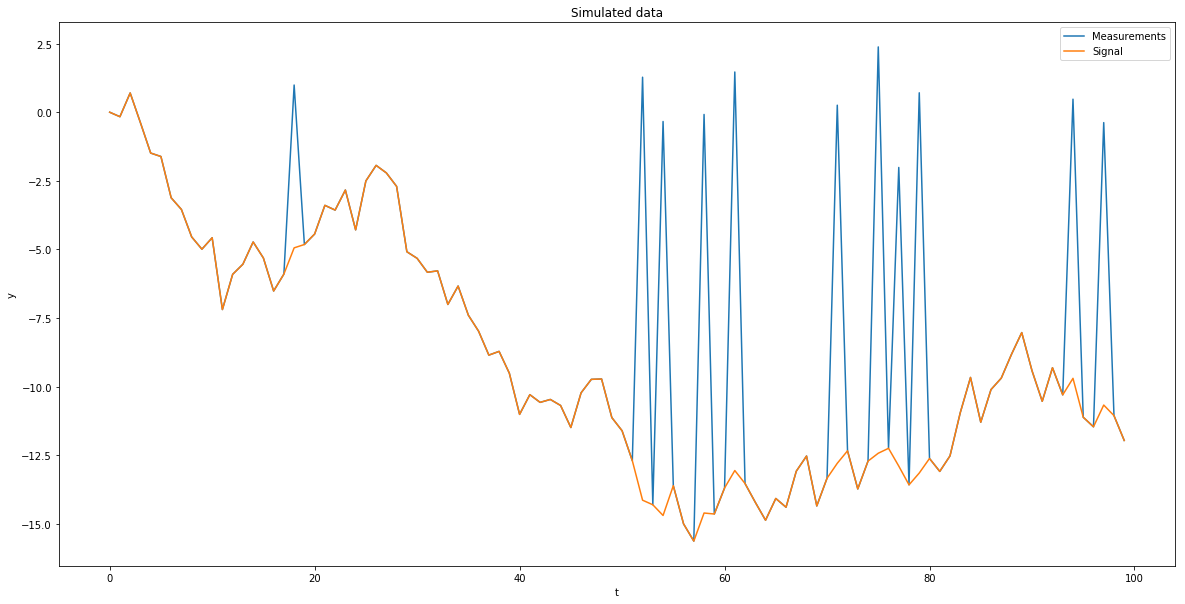

In [3]:
plt.figure(figsize=(20,10))
plt.plot(y,label="Measurements")
plt.plot(x,label="Signal")
plt.title("Simulated data")
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

In [4]:
from scipy.stats import norm

In [69]:
particles = 100000
u_k = np.zeros((t,particles))
m_k = np.zeros((t,particles))
p_k = np.zeros((t,particles))
p_k[0] = np.repeat(1,particles)
w_ki = np.zeros((t,particles))
indexes = np.array(range(0,particles))
w_ki[0] = np.repeat(1/particles,particles)
u_k[0] = np.random.binomial(1, p,particles)
est_y = np.zeros(t)
for i in range(1,t):
    #prediction step
    u_k[i] = np.random.binomial(1, p,particles)
    m_k_ = m_k[i-1]
    p_k_ = p_k[i-1]+1
    
    #update step
    y_k = (1-u_k[i])*m_k_
    S_k = (1-u_k[i])**2*p_k_ + 1 + 9 *u_k[i]
    K_k = p_k_*(1-u_k[i])*(1/S_k)
    m_k[i] = m_k_ + K_k*(y[i]-y_k)
    p_k[i] = p_k_ - K_k**2*S_k
    

    #calculate weights 
    
    #marginal measurement likelihood
    meas = norm.pdf(y[i],loc = m_k[i] , scale=np.sqrt(p_k[i] + 1 + 9*u_k[i]))
    #
    dyn = norm.pdf(m_k[i-1],loc = m_k[i] , scale=1)
    
    #print(meas)
    #propability to generate seq?
    #seq_u = p**np.sum(u_k,axis=0)*(1-p)**(i-np.sum(u_k,axis=0))
    
    w_ki[i] = w_ki[i-1]*meas*dyn/(p**u_k[i]*(1-p)**(1-u_k[i]))
    w_ki[i] = w_ki[i]/np.sum(w_ki[i])
    #resampling
    est_y[i] = np.sum( w_ki[i] * m_k[i])
    selected_indexes = np.random.choice(indexes,p=w_ki[i],size=particles)
    n_eff = 1 / np.sum(w_ki[i]**2)
    if(n_eff < 0.2*particles):
        m_k = m_k[:,selected_indexes]
        p_k = p_k[:,selected_indexes]
        w_ki[i] = np.repeat(1/particles,particles)
        u_k =  u_k[:,selected_indexes]


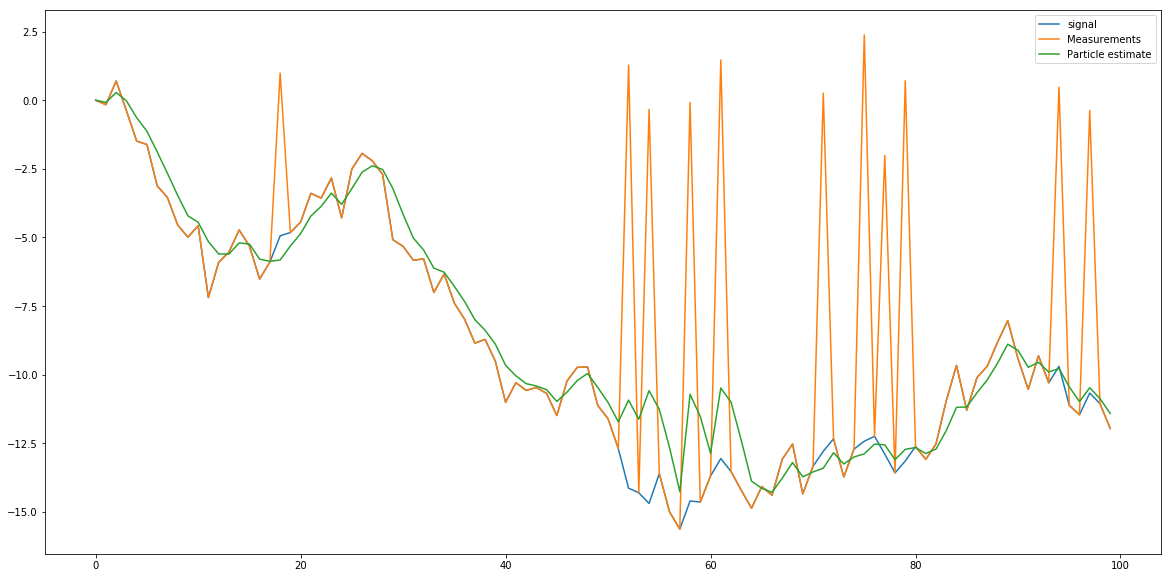

In [70]:
plt.figure(figsize=(20,10))
plt.plot(x,label="signal")
plt.plot(y, label="Measurements")
plt.plot(est_y, label="Particle estimate")
#plt.plot(m_k[:,0],label='meas')
plt.legend()
plt.show()

In [71]:
mean_squared_error(y,x)

18.09374545776954

In [72]:
mean_squared_error(est_y,x)

1.2735712486918558

# Exercise 3. (Rao-Blackwellized Particle Filter II)

Recall that the optimal proposal is
given by

$$ \pi(u_k|u_{1:k-1},y_{1:k}) \propto p(y_k|u_{1:k},y_{1:k-1})p(u_k|u_k-1)$$

**(a)** Derive the optimal importance proposal for $u_k$

$ \pi(u_k|u_{1:k-1},y_{1:k}) \propto p(y_k|u_{1:k},y_{1:k-1})p(u_k|u_{k-1}) $

$ = p(u_k|u_{k-1})\int p(y_k|x_k,u_{1:k},y_{1:k-1})p(x_k|u_{1_k},y_{1:k-1})dx_k$

$ = p(u_k|u_{k-1})\int p(y_k|x_k,u_{k})p(x_k|u_{1_k},y_{1:k-1})dx_k$

$ = p(u_k|u_{k-1}) \int p(y_k|x_k,u_{k})N(x_k|m_k^-,P_k^-)dx_k $

$ = p(u_k|u_{k-1})\int  N(y_k|(1-u_k)x_k,1+9u_k) N(x_k|m_k^-,P_k^-)dx_k $

$ =p^{u_k}(1-p)^{1-u_k} \int  N(y_k|(1-u_k)x_k,1+9u_k) N(x_k|m_k^-,P_k^-)dx_k $

$ =p^{u_k}(1-p)^{1-u_k} \int N(x_k,y_k|\frac{(1+9u_k)m_k^- + P_k^-(1-u_k)x_k}{1+9u_k +  P_k^- },\frac{1}{\frac{1}{1+9u_k}+\frac{1}{P_k^-}})dx_k $


$(y-(1−𝑢_𝑘)𝑥_𝑘)^2

$ =p^{u_k}(1-p)^{1-u_k} (\frac{(1+9u_k)m_k^-}{1+9u_k +  P_k^-} + \int N(\frac{P_k^-(1-u_k)x_k}{1+9u_k +  P_k^-},\frac{1}{\frac{1}{1+9u_k}+\frac{1}{P_k^-}})dx_k) $

$ =p^{u_k}(1-p)^{1-u_k} (\frac{(1+9u_k)m_k^-}{1+9u_k +  P_k^-} + \frac{P_k^-(1-u_k)}{1+9u_k +  P_k^-}) $

**(b)** (Bonus) Implement a Rao-Blackwellized particle filter using the optimal
proposal and compare against your Rao-Blackwellized bootstrap filter
from the previous exercise.